In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/grain4.0/grain_128_output.csv')

data

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Y
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,127
65532,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,127
65533,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,127
65534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,127


In [ ]:
# Separate features and target variable
X = data.drop('Y', axis=1)  # Input features
y = data['Y']  # Target variable
X
y


0          0
1          0
2          0
3          0
4          0
        ... 
65531    127
65532    127
65533    127
65534    127
65535    127
Name: Y, Length: 65536, dtype: int64

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train
X_test
y_train
y_test

63127    123
41103     80
3989       7
37213     72
30665     59
        ... 
3489       6
44346     86
7078      13
40694     79
59132    115
Name: Y, Length: 13108, dtype: int64

In [ ]:
# Define the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model


DecisionTreeRegressor(random_state=42)

In [ ]:
# Define hyperparameters for RandomizedSearchCV
parameters = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
parameters



{'criterion': ['mse', 'friedman_mse', 'mae'],
 'splitter': ['best', 'random'],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_iter=100, cv=3, scoring='neg_mean_squared_error', random_state=64, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search
# Best parameters and model


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
204 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   random_state=64, scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters found:", random_search.best_params_)
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Best parameters found: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'friedman_mse'}
Mean Squared Error: 7.616875190723222
R^2 Score: 0.9943948723389509


Text(0.5, 1.0, 'Predicted vs. Actual Values')

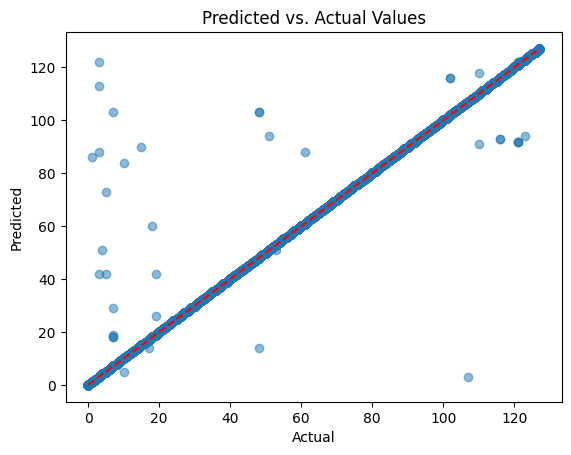

In [ ]:
import matplotlib.pyplot as plt
predictions = best_model.predict(X_test)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')

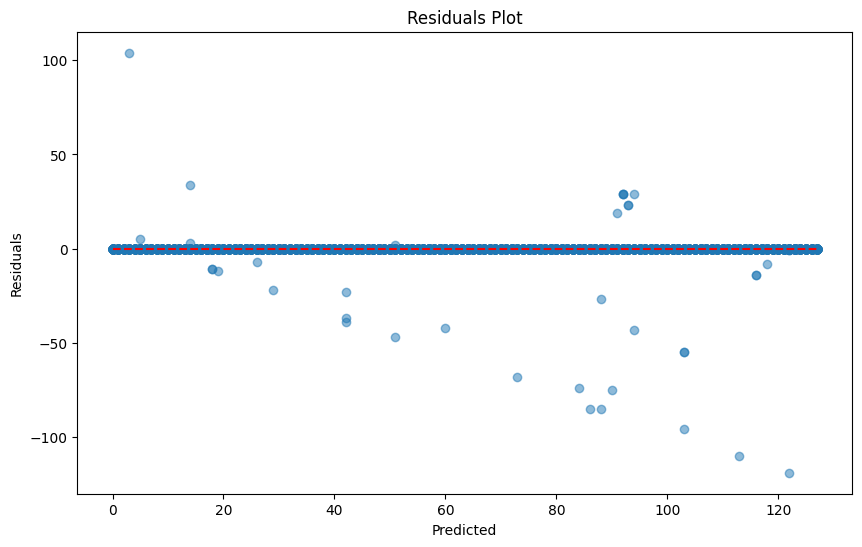

In [ ]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.hlines(0, predictions.min(), predictions.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
# Convert the NumPy array to a Pandas DataFrame
X_test_df = pd.DataFrame(X_test)

# Calculate the correlation matrix
corr_matrix = X_test_df.corr()

In [ ]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.000000,-0.034401,0.031924,-0.034359,-0.035223,0.032040,-0.034401,0.027265,-0.034525,-0.035426,...,0.017334,-0.014279,-0.003121,0.071725,-0.054757,0.010521,-0.005560,-0.044072,-0.027422,0.022391
1,-0.034401,1.000000,-0.033795,0.041246,-0.034561,-0.033754,0.016968,-0.032888,0.002232,-0.034760,...,-0.049471,0.044072,-0.013950,-0.018429,0.087432,-0.054645,0.028922,0.035891,-0.033919,-0.020857
2,0.031924,-0.033795,1.000000,-0.033754,0.024397,-0.033795,-0.033795,0.026400,-0.033917,0.005104,...,0.088460,-0.057540,0.003516,0.000764,-0.010763,0.081093,-0.062680,-0.040737,0.007162,-0.005386
3,-0.034359,0.041246,-0.033754,1.000000,-0.034519,0.012230,-0.033713,-0.032848,0.043282,-0.034718,...,-0.041160,0.080052,-0.006510,-0.016341,-0.002113,0.000512,0.086107,0.012267,-0.000082,0.026953
4,-0.035223,-0.034561,0.024397,-0.034519,1.000000,-0.034561,0.022143,-0.033674,-0.034686,0.024178,...,0.001148,-0.047682,0.066990,-0.015827,0.005995,-0.009868,0.001839,0.085945,0.028271,0.002037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.010521,-0.054645,0.081093,0.000512,-0.009868,-0.001593,0.001059,0.093483,-0.044011,-0.001989,...,0.080514,0.007617,-0.038717,-0.012408,-0.008342,1.000000,-0.007927,-0.028243,-0.037354,-0.011510
124,-0.005560,0.028922,-0.062680,0.086107,0.001839,-0.023399,-0.003889,-0.006830,0.081744,-0.036027,...,0.060718,0.059013,0.000462,-0.049388,-0.018731,-0.007927,1.000000,0.014888,-0.017848,-0.045351
125,-0.044072,0.035891,-0.040737,0.012267,0.085945,-0.013821,-0.001393,-0.025232,0.005584,0.089058,...,0.018158,0.073534,0.040433,-0.015082,-0.023913,-0.028243,0.014888,1.000000,0.022198,-0.014128
126,-0.027422,-0.033919,0.007162,-0.000082,0.028271,0.081554,-0.022459,-0.017486,-0.019010,-0.010416,...,-0.103389,0.043493,0.105856,0.030834,-0.014558,-0.037354,-0.017848,0.022198,1.000000,0.007974


from matplotlib import pyplot as plt
corr_matrix[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


from matplotlib import pyplot as plt
corr_matrix.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr_matrix[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import joblib

# Save the model
joblib_file = '/content/drive/MyDrive/Colab Notebooks/grain4.0/reg_decision_tree_model.pkl'
joblib.dump(best_model, joblib_file)
joblib

<module 'joblib' from '/usr/local/lib/python3.10/dist-packages/joblib/__init__.py'>

In [ ]:
from sklearn.metrics import accuracy_score
loaded_model = joblib.load(joblib_file)

# Verify loaded model
loaded_y_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print("Loaded model accuracy:", loaded_accuracy)

Loaded model accuracy: 0.9970247177296307


In [ ]:
import numpy as np
import joblib

# Load the model
joblib_file = '/content/drive/MyDrive/Colab Notebooks/grain4.0/best_decision_tree_model.pkl'
loaded_model = joblib.load(joblib_file)

# Example input (128 bits)
input_bits = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1]  # Sample input, up to 128 bits

# Ensure the input is in the correct shape (1, 128)
input_array = np.array(input_bits).reshape(1, -1)

# Predict the faulty position using the model
predicted_position = loaded_model.predict(input_array)

# Print the faulty position
print(f"Faulty position: {predicted_position[0]}")


Faulty position: 5


In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(best_model, feature_names=list(data.columns[:-1]))
tree_rules


'|--- 103 <= 0.50\n|   |--- 101 <= 0.50\n|   |   |--- 109 <= 0.50\n|   |   |   |--- 43 <= 0.50\n|   |   |   |   |--- 99 <= 0.50\n|   |   |   |   |   |--- 102 <= 0.50\n|   |   |   |   |   |   |--- 44 <= 0.50\n|   |   |   |   |   |   |   |--- 100 <= 0.50\n|   |   |   |   |   |   |   |   |--- 65 <= 0.50\n|   |   |   |   |   |   |   |   |   |--- 45 <= 0.50\n|   |   |   |   |   |   |   |   |   |   |--- 111 <= 0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19\n|   |   |   |   |   |   |   |   |   |   |--- 111 >  0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16\n|   |   |   |   |   |   |   |   |   |--- 45 >  0.50\n|   |   |   |   |   |   |   |   |   |   |--- 124 <= 0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5\n|   |   |   |   |   |   |   |   |   |   |--- 124 >  0.50\n|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4\n|   |   |   |   |   |   |   |   |--- 65 >  0.

In [ ]:
print(best_model.get_params())


{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [ ]:
feature_importances = best_model.feature_importances_
for feature, importance in zip(data.columns[:-1], feature_importances):
    print(f'{feature}: {importance:.4f}')


0: 0.0000
1: 0.0007
2: 0.0001
3: 0.0089
4: 0.0085
5: 0.0100
6: 0.0004
7: 0.0000
8: 0.0039
9: 0.0091
10: 0.0019
11: 0.0009
12: 0.0029
13: 0.0000
14: 0.0002
15: 0.0086
16: 0.0001
17: 0.0003
18: 0.0162
19: 0.0107
20: 0.0044
21: 0.0003
22: 0.0023
23: 0.0086
24: 0.0110
25: 0.0002
26: 0.0154
27: 0.0001
28: 0.0002
29: 0.0043
30: 0.0022
31: 0.0034
32: 0.0002
33: 0.0000
34: 0.0004
35: 0.0010
36: 0.0016
37: 0.0009
38: 0.0019
39: 0.0170
40: 0.0132
41: 0.0258
42: 0.0066
43: 0.0243
44: 0.0127
45: 0.0036
46: 0.0060
47: 0.0189
48: 0.0116
49: 0.0204
50: 0.0004
51: 0.0134
52: 0.0021
53: 0.0019
54: 0.0002
55: 0.0036
56: 0.0010
57: 0.0042
58: 0.0043
59: 0.0043
60: 0.0020
61: 0.0115
62: 0.0013
63: 0.0048
64: 0.0152
65: 0.0085
66: 0.0008
67: 0.0075
68: 0.0121
69: 0.0022
70: 0.0028
71: 0.0011
72: 0.0180
73: 0.0124
74: 0.0060
75: 0.0085
76: 0.0048
77: 0.0142
78: 0.0152
79: 0.0129
80: 0.0083
81: 0.0100
82: 0.0224
83: 0.0045
84: 0.0167
85: 0.0109
86: 0.0105
87: 0.0029
88: 0.0213
89: 0.0040
90: 0.0092
91: 0.013

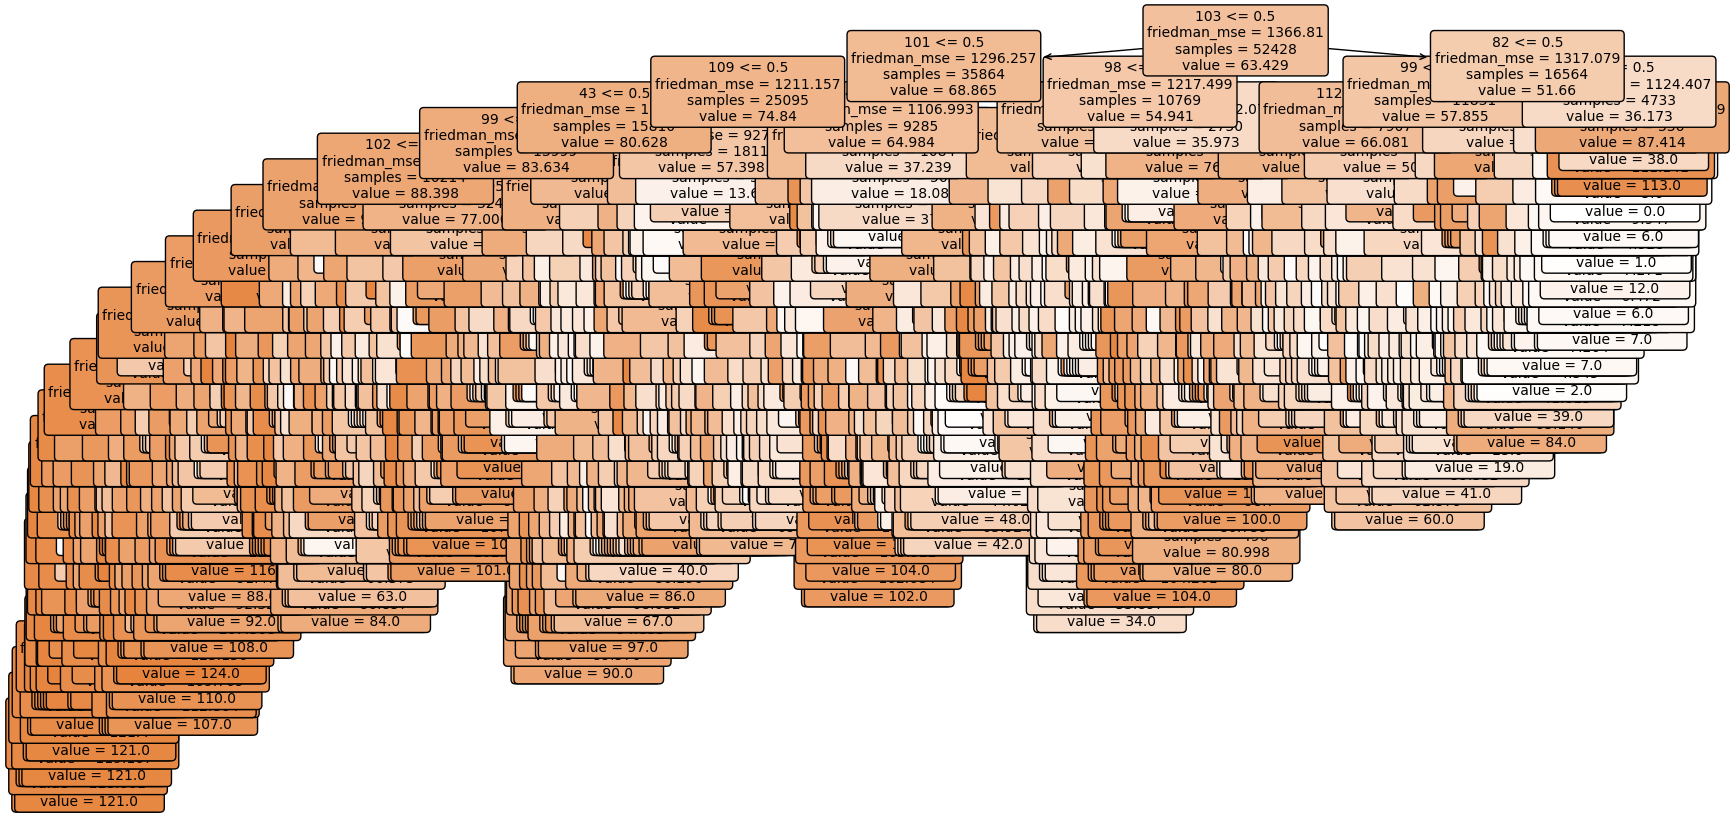

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=list(data.columns[:-1]), filled=True, rounded=True, fontsize=10)
plt.show()
